In [1]:
import re

import torch

In [2]:
f = open('file1', 'r', encoding='Latin-1')
text = f.read()

In [3]:
leads = {'I': '\(I\)',
         'II': '\(II\)',
         'III': '\(III\)',
         'AVR': '\(aVR\)',
         'AVL': '\(aVL\)',
         'AVF': '\(aVF\)',
         'V1': '\(V1\)',
         'V2': '\(V2\)',
         'V3': '\(V3\)',
         'V4': '\(V4\)',
         'V5': '\(V5\)',
         'V6': '\(V6\)'}

SyntaxError: invalid syntax (4211799135.py, line 1)

In [283]:
def save_csv(path):
    f = open(path, 'r', encoding='Latin-1')
    text = f.read()
    indices = {lead:find_ind(text, leads, lead) for lead in leads}
    if not indices['I']:
        return
    text_by_lead = {lead:lead_to_text(text, indices,lead ) for lead in leads}
    time_series_by_lead = {lead:make_time_series(text_by_lead[lead]) for lead in text_by_lead}
    time_series_by_lead2 = {lead: [tup[1] for tup in time_series_by_lead[lead]] for lead in time_series_by_lead}
    df = pd.DataFrame(time_series_by_lead2)
    df.to_csv(f'{path}.csv')

In [278]:
def find_ind(text,leads,lead):
    start_obj = re.search(rf'{leads[lead]}.*\n', text)
    if start_obj:
        start_index = start_obj.end()
    else:
        return
    end_inedx = re.search(rf'S.*\n', text[start_index:]).start()+start_index
    return start_index,end_inedx

In [5]:
def lead_to_text(text,indices,lead):
    return text[indices[lead][0]:indices[lead][1]]

In [6]:
indices = {lead:find_ind(text, leads, lead) for lead in leads}

In [7]:
text_by_lead = {lead:lead_to_text(text, indices,lead ) for lead in leads}

In [8]:
for line in text_by_lead['V6'].split('\n')[1:-1]:
    tup = tuple(map(float,line[:-2].split(' ')))
    print(tup)

(19850.0, -14022.5)
(19852.5, -14023.1)
(19855.0, -14023.8)
(19857.5, -14023.8)
(19860.0, -14024.4)
(19862.5, -14025.6)
(19865.0, -14026.3)
(19867.5, -14026.9)
(19870.0, -14027.5)
(19872.5, -14027.5)
(19875.0, -14027.5)
(19877.5, -14027.5)
(19880.0, -14026.9)
(19882.5, -14026.9)
(19885.0, -14026.3)
(19887.5, -14026.9)
(19890.0, -14026.9)
(19892.5, -14027.5)
(19895.0, -14028.1)
(19897.5, -14028.8)
(19900.0, -14028.8)
(19902.5, -14029.4)
(19905.0, -14030.0)
(19907.5, -14031.3)
(19910.0, -14032.5)
(19912.5, -14033.8)
(19915.0, -14035.0)
(19917.5, -14035.0)
(19920.0, -14034.4)
(19922.5, -14034.4)
(19925.0, -14033.8)
(19927.5, -14034.4)
(19930.0, -14034.4)
(19932.5, -14034.4)
(19935.0, -14033.8)
(19937.5, -14033.8)
(19940.0, -14033.8)
(19942.5, -14033.1)
(19945.0, -14032.5)
(19947.5, -14032.5)
(19950.0, -14033.1)
(19952.5, -14033.8)
(19955.0, -14034.4)
(19957.5, -14035.0)
(19960.0, -14036.3)
(19962.5, -14038.1)
(19965.0, -14038.8)
(19967.5, -14039.4)
(19970.0, -14039.4)
(19972.5, -14039.4)


In [19]:
def make_time_series(text):

    relevant_lines = text.split('\n')[1:-1]
    time_series = [tuple(map(float,line[:-2].split(' '))) for line in relevant_lines]
    return time_series

In [54]:
time_series_by_lead = {lead:make_time_series(text_by_lead[lead]) for lead in text_by_lead}
time_series_by_lead2 = {lead: [tup[1] for tup in time_series_by_lead[lead]] for lead in time_series_by_lead}

{'I': [-6000.63,
  -6004.38,
  -6008.13,
  -6011.88,
  -6015.63,
  -6018.75,
  -6022.5,
  -6026.25,
  -6030.0,
  -6033.13,
  -6036.88,
  -6040.63,
  -6044.38,
  -6045.63,
  -6046.25,
  -6047.5,
  -6048.13,
  -6048.75,
  -6049.38,
  -6050.0,
  -6050.0,
  -6051.25,
  -6051.88,
  -6053.13,
  -6053.13,
  -6053.75,
  -6053.75,
  -6053.13,
  -6052.5,
  -6053.13,
  -6053.75,
  -6054.38,
  -6055.0,
  -6055.63,
  -6056.25,
  -6056.25,
  -6056.25,
  -6055.63,
  -6055.63,
  -6056.25,
  -6056.25,
  -6055.0,
  -6055.0,
  -6055.0,
  -6055.0,
  -6055.63,
  -6055.0,
  -6053.75,
  -6053.75,
  -6053.75,
  -6053.13,
  -6053.13,
  -6054.38,
  -6054.38,
  -6055.0,
  -6054.38,
  -6053.75,
  -6053.75,
  -6054.38,
  -6056.25,
  -6056.88,
  -6056.88,
  -6057.5,
  -6058.13,
  -6058.13,
  -6059.38,
  -6059.38,
  -6060.0,
  -6060.63,
  -6060.63,
  -6060.63,
  -6060.0,
  -6060.63,
  -6060.63,
  -6060.63,
  -6060.63,
  -6061.25,
  -6061.88,
  -6062.5,
  -6063.75,
  -6064.38,
  -6064.38,
  -6064.38,
  -6064.38,
  -6

In [79]:
import pandas as pd
import seaborn as sns

In [57]:
df = pd.DataFrame(time_series_by_lead2)

In [87]:
df.to_csv(path)

,I,II,III,AVR,AVL,AVF,V1,V2,V3,V4,V5,V6
0,-6000.63,-10000.0,-13999.4,-5905.00,-10036.9,-14060.6,-6017.50,-10090.0,-14095.0,-6013.75,-10027.5,-14022.5
1,-6004.38,-10001.9,-13998.1,-5904.38,-10035.6,-14062.5,-6018.13,-10090.6,-14095.0,-6013.75,-10026.9,-14023.1
2,-6008.13,-10005.0,-13997.5,-5904.38,-10035.6,-14062.5,-6019.38,-10091.3,-14095.6,-6013.75,-10026.9,-14023.8
3,-6011.88,-10007.5,-13996.9,-5905.00,-10035.6,-14061.9,-6020.63,-10091.9,-14095.6,-6014.38,-10026.3,-14023.8
4,-6015.63,-10010.6,-13995.6,-5905.63,-10035.6,-14061.3,-6021.88,-10091.9,-14095.6,-6015.00,-10026.3,-14024.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-6093.75,-10108.8,-14015.6,-5951.88,-10039.4,-14011.9,-5983.75,-10028.8,-14006.9,-6040.63,-10051.3,-14053.1
2496,-6093.13,-10108.1,-14015.6,-5951.88,-10039.4,-14011.3,-5984.38,-10028.1,-14006.9,-6038.13,-10049.4,-14051.9
2497,-6091.88,-10107.5,-14016.3,-5952.50,-10039.4,-14011.3,-5985.00,-10027.5,-14006.9,-6036.25,-10047.5,-14050.6
2498,-6090.63,-10106.3,-14015.6,-5953.13,-10039.4,-14010.6,-5985.63,-10026.9,-14006.9,-6033.75,-10045.6,-14049.4


In [67]:
avg = df - df.mean()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

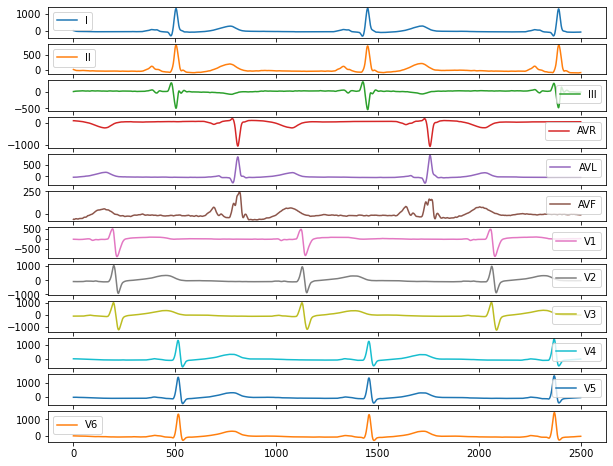

In [141]:
avg.plot.line(subplots=True,figsize=(10,8))

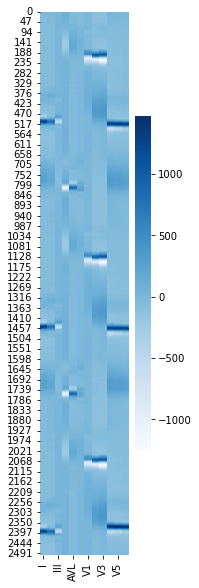

In [245]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,10))
fig = sns.heatmap(avg,cmap='Blues')


In [244]:
import os



In [270]:
scans_path = 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans'
walk = os.walk(scans_path)
file_paths = []
for folder in walk:
    if not folder[1]:
        for file in folder[2]:
            file_paths.append(f'{folder[0]}\\{file}')

['C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\1025139\\1025139', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\1026632\\1026632', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\10266328\\10266328', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\10890432\\10890432', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\11281854\\11281854', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\11384047\\11384047', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\13551395\\13551395', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\1419225\\1419225', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\14817381\\14817381', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\15717614\\15717614', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\16991507\\16991507', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\203647672\\203647672', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\208417477\\208417477', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\21126826\\21126826', 'C:\\Us

In [284]:
for path in file_paths:
    print(path)
    save_csv(path)

C:\Users\rbenjos\Desktop\ekg_project\scans\1025139\1025139
C:\Users\rbenjos\Desktop\ekg_project\scans\1026632\1026632
C:\Users\rbenjos\Desktop\ekg_project\scans\10266328\10266328
C:\Users\rbenjos\Desktop\ekg_project\scans\10890432\10890432
C:\Users\rbenjos\Desktop\ekg_project\scans\11281854\11281854
C:\Users\rbenjos\Desktop\ekg_project\scans\11384047\11384047
C:\Users\rbenjos\Desktop\ekg_project\scans\13551395\13551395
C:\Users\rbenjos\Desktop\ekg_project\scans\1419225\1419225
C:\Users\rbenjos\Desktop\ekg_project\scans\14817381\14817381
C:\Users\rbenjos\Desktop\ekg_project\scans\15717614\15717614
C:\Users\rbenjos\Desktop\ekg_project\scans\16991507\16991507
C:\Users\rbenjos\Desktop\ekg_project\scans\203647672\203647672
C:\Users\rbenjos\Desktop\ekg_project\scans\208417477\208417477
C:\Users\rbenjos\Desktop\ekg_project\scans\21126826\21126826
C:\Users\rbenjos\Desktop\ekg_project\scans\23857964\23857964
C:\Users\rbenjos\Desktop\ekg_project\scans\25550963\25550963
C:\Users\rbenjos\Desktop\e

In [295]:
f = open('C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\314517210\\314517210-1', 'r', encoding='h')
text = f.read()
f.close()

LookupError: unknown encoding: h

In [296]:
scans_path = 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans'
walk = os.walk(scans_path)
csv_paths = []
for folder in walk:
    if not folder[1]:
        for file in folder[2]:
            if 'csv' in file:
                csv_paths.append(f'{folder[0]}\\{file}')

print(csv_paths)

['C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\1025139\\1025139.csv', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\11281854\\11281854.csv', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\16991507\\16991507.csv', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\23857964\\23857964.csv', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\29333895\\29333895.csv', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\3071370\\3071370-1.csv', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\3071370\\3071370-2.csv', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\310896204\\310896204.csv', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\311216188\\311216188.csv', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\314174244\\file1.csv', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\324610195\\324610195.csv', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\332299007\\332299007.csv', 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\scans\\41766072\\41766072.csv', 'C:\\Users\\rbenjos\

In [325]:
df = pd.read_csv(csv_paths[0],index_col=0)
dfs = [pd.read_csv(path,index_col=0) for path in csv_paths]

In [324]:
torch.Tensor(df.values).shape

torch.Size([2500, 12])

In [327]:
dfs = [df.values for df in dfs]
dataset = torch.Tensor(dfs)

In [341]:
torch.save(dataset,'severe_ds.pt')

In [344]:

# importing required modules
import PyPDF2

# creating a pdf file object
pdfFileObj = open('Z:\\Downloads\\314517210-2_unlocked.pdf', 'rb')

# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

# printing number of pages in pdf file
print(pdfReader.numPages)

# creating a page object
pageObj = pdfReader.getPage(0)

# extracting text from page
print(pageObj)

# closing the pdf file object
pdfFileObj.close()

1
{'/Type': '/Page', '/CropBox': [0, 0, 792, 612], '/MediaBox': [0, 0, 792, 612], '/Resources': {'/ProcSet': ['/PDF', '/Text', '/ImageB', '/ImageC', '/ImageI'], '/Font': {'/QuickPDFF232b8c25': IndirectObject(4, 0, 1530353135520)}}, '/Contents': [IndirectObject(10, 0, 1530353135520), IndirectObject(11, 0, 1530353135520)], '/Parent': IndirectObject(2, 0, 1530353135520)}


In [375]:
from PyPDF2 import PdfReader

reader = PdfReader('Z:\\Downloads\\314517210-2_unlocked.pdf')

page = reader.pages[0]
count = 0

for image_file_object in page.images:
    with open(str(count) + image_file_object.name, "wb") as fp:
        fp.write(image_file_object.data)
        count += 1

reader.pages[0]

{'/Type': '/Page',
 '/CropBox': [0, 0, 792, 612],
 '/MediaBox': [0, 0, 792, 612],
 '/Resources': {'/ProcSet': ['/PDF', '/Text', '/ImageB', '/ImageC', '/ImageI'],
  '/Font': {'/QuickPDFF232b8c25': {'/Type': '/Font',
    '/Subtype': '/Type0',
    '/Encoding': '/Identity-H',
    '/BaseFont': '/CVGLNJ+Arial',
    '/ToUnicode': {'/Type': '/CMap',
     '/CMapName': '/Adobe-Identity-0',
     '/CIDSystemInfo': {'/Registry': 'Adobe',
      '/Ordering': 'Identity',
      '/Supplement': 0},
     '/WMode': 0},
    '/DescendantFonts': [IndirectObject(6, 0, 1530394079136)]}}},
 '/Contents': [IndirectObject(10, 0, 1530394079136),
  IndirectObject(11, 0, 1530394079136)],
 '/Parent': {'/Type': '/Pages',
  '/Kids': [IndirectObject(3, 0, 1530394079136)],
  '/Count': 1}}

In [2]:
import scipy.io
import pandas as pd
import os
import torch




CPSC_PATH = 'Z:\Downloads\SINUS'

walk = os.walk(CPSC_PATH)
files = next(walk)[2]
paths = [f'{CPSC_PATH}\\{file}' for file in files if 'mat' in file]



In [12]:
import numpy as np

In [16]:
def return_signal(path):
    mat = scipy.io.loadmat((path))
    mat_list = list(mat.values())[0]
    df = np.array(mat_list).T
    return df


In [18]:
signals = [return_signal(path) for path in paths]

In [17]:
signals_con = [return_signal(path) for path in paths]

array([[ -1, -15, -15, ...,   0,  -5, -11],
       [ -4, -23, -18, ...,  -3,  -9, -20],
       [  2, -18, -20, ..., -11, -17, -24],
       ...,
       [-25, -64, -39, ..., -16, -27, -40],
       [-23, -57, -34, ..., -10, -21, -33],
       [-32, -52, -20, ...,  -8, -23, -34]], dtype=int16)

In [48]:
signals_short = [signal[:1250] for signal in signals[:3000]]

In [52]:
healthy_ds = torch.Tensor(signals_short)

torch.Size([3000, 1250, 12])

In [60]:
healthy_ds = healthy_ds.permute((0,2,1))

In [62]:
torch.save(healthy_ds,'healthy_ds.pt')


In [30]:
cropped_healthy = dataset[:3000,:2500,:]

In [33]:
single = dataset[:1,:1,:]
torch.save(single,'single.pt')

In [44]:
def show_ecg(record):
    df = pd.DataFrame(record[:1250])
    df.plot.line(subplots=True,figsize=(10,8))

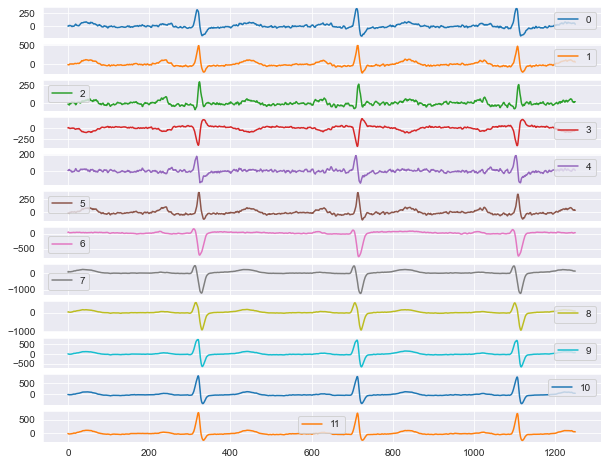

In [31]:
torch.save(cropped_healthy,'cropped_healthy_ds.pt')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

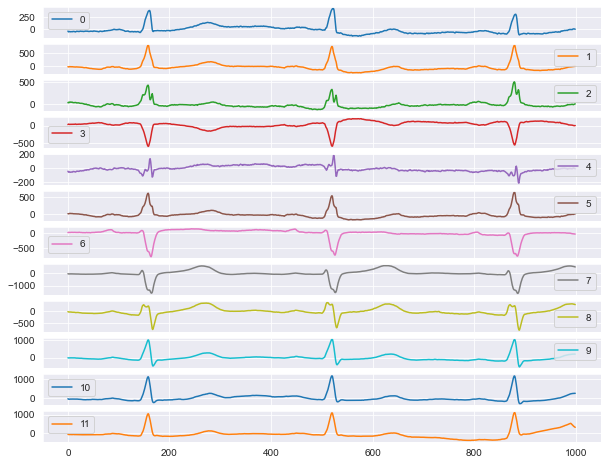

In [88]:
df.iloc[:1000].plot.line(subplots=True,figsize=(10,8))

In [1]:
TORCH_PATH = 'C:\\Users\\rbenjos\\Desktop\\ekg_project\\severe_ds.pt'

import torch


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

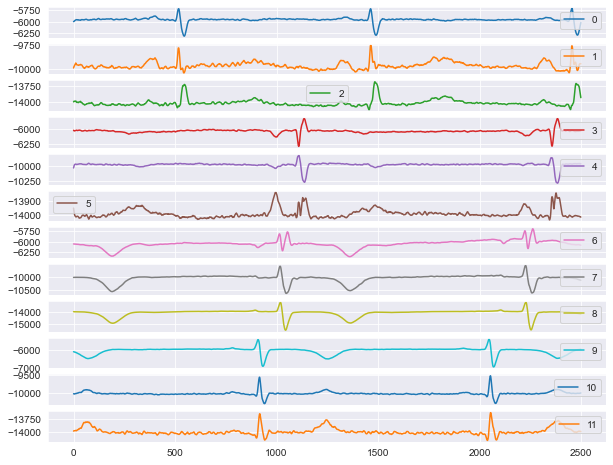

In [19]:
scans = torch.load(TORCH_PATH)
cur_scan = scans[3,:,:]
import pandas as pd
df = pd.DataFrame(cur_scan)
df.plot.line(subplots=True,figsize=(10,8))

In [3]:
import torch
PATH = "C:\\Users\\rbenjos\\Desktop\\ekg_proj\\healthy_ds.pt"
ds = torch.load(PATH)

ds.shape

torch.Size([6877, 7085, 12])

In [10]:
cropped = ds[:3000,:2500].clone()
torch.save(cropped,'cropped_healthy.pt')

In [11]:
PATH2 = "C:\\Users\\rbenjos\\Desktop\\ekg_proj\\cropped_healthy.pt"
ds1 = torch.load(PATH2)
ds1.shape

torch.Size([3000, 2500, 12])